# ML FROM SCRATCH WITH LOAN PREDICTION

<img src='https://drive.google.com/uc?id=1LZz7B6QHtupGwocuejQrx2RFK3ck178F' width=1000 >

### In this Notebook we will Learn:-
* Basic EDA.
* Dealing with missing values.
* Aplly Scaling on Feature matrix.
* Spliting the Dataset into training set and test set.
* Dealing with Categorical Dataset.
* Dimensionality Reduction (PCA) .
* K-Cross validation to check accuracy.
* Logistic Regression    
* Random Forest
* Prediction on new Values.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
print()
print("The files in the dataset are:-")
from subprocess import check_output
print(check_output(['ls','../input']).decode('utf'))

# Any results you write to the current directory are saved as output.

['credit_train.csv', 'credit_test.csv']

The files in the dataset are:-
credit_test.csv
credit_train.csv



In [1]:
# Importing the dataset.
df_train = pd.read_csv("../input/credit_train.csv")
df_test = pd.read_csv("../input/credit_test.csv")

NameError: name 'pd' is not defined

In [2]:
# Let us check the top 5 entries in training dataset.
df_train.head()

NameError: name 'df_train' is not defined

# BASIC ANALYSIS

In [1]:
# We need to convert the values of years in current job into integer format.
df_train['Years in current job'] = df_train['Years in current job'].map({'8 years':8, '10+ years':15,
                                        '3 years':3, '5 years':5, '< 1 year':0.5, 
                            '2 years':2, '4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6})

df_test['Years in current job'] = df_test['Years in current job'].map({'8 years':8, '10+ years':15,
                                        '3 years':3, '5 years':5, '< 1 year':0.5, 
                            '2 years':2, '4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6})
# Run it one time on the secons time the all values become NaN.
# To solve this problem, run the code from beginning.

NameError: name 'df_train' is not defined

#### Let us check the null values in the dataset.

In [5]:
temp_df = df_train.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0]/len(df_train))*100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(df_train)}")
temp_df

The length of dataset is 	 100514


,Column Name,Number of null values,Null values in percentage
0,Loan ID,514,0.511372
1,Customer ID,514,0.511372
2,Loan Status,514,0.511372
3,Current Loan Amount,514,0.511372
4,Term,514,0.511372
5,Credit Score,19668,19.567423
6,Annual Income,19668,19.567423
7,Years in current job,4736,4.711781
8,Home Ownership,514,0.511372
9,Purpose,514,0.511372


* 50% of data in Months since last delinquest column is fill with null values.
* We can remove this column but now we are removing this column.
* We will fill these values later with it's mean values.


In [6]:
# Let's remove unwanted columns
try:
    df_test.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)
    df_train.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)
    
    
except Exception as e:
    pass

### Let us deal with missing values in categorical data.

#### 1). With 'Term' column.

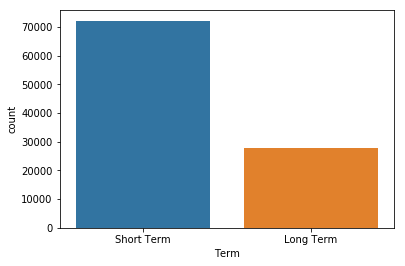

In [7]:
sns.countplot(data=df_train, x='Term')
plt.show()

* As maximum are from 'Short Term' then we will replace the missing values with the 'Short Term' .

In [8]:
df_train['Term'].fillna(value='Short Term', inplace=True)
df_test['Term'].fillna(value='Short Term', inplace=True)


#### 2). With 'Home Ownership' coulmn

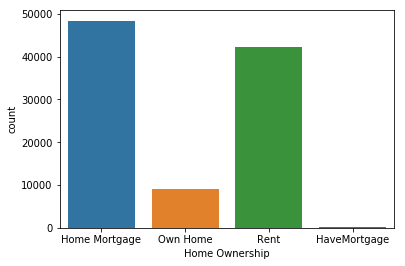

In [9]:
sns.countplot(data=df_train, x='Home Ownership')
plt.show()

* Here Home Mortage and Rent values are at the same number of count.
* So we willl replace it by Home Mortgage.

In [10]:
df_train['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage', nan],
      dtype=object)

In [11]:
df_train['Home Ownership'].fillna(value='Home Mortgage', inplace=True)
df_test['Home Ownership'].fillna(value='Home Mortgage', inplace=True)

### 3). With 'Purpose' column

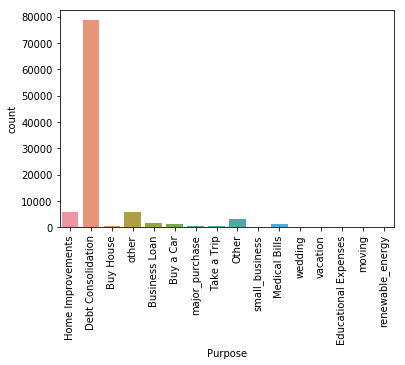

In [12]:
sns.countplot(data=df_train, x='Purpose')
plt.xticks(rotation=90)
plt.show()

* Here we will replace missing values with 'Debt Consolidation'. 

In [13]:
df_train['Purpose'].fillna(value='Debt Consolidation', inplace=True)
df_test['Purpose'].fillna(value='Debt Consolidation', inplace=True)

#### 4). With 'Loan Status' column.

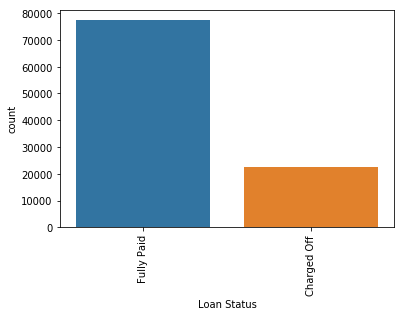

In [14]:
sns.countplot(data=df_train, x='Loan Status')
plt.xticks(rotation=90)
plt.show()

In [15]:
 # Let us plot the same graph but inter-active this time with the help of plotly.
    
count = df_train['Loan Status'].value_counts().reset_index()
count.iplot(kind='bar', x='index', y='Loan Status', xTitle='Loan Status', yTitle='Frequency',
           color='deepskyblue', title='Fully Paid VS Charged off')

* Here we eill replace missing values with Fully Paid.

In [16]:
df_train['Loan Status'].fillna(value='Fully Paid', inplace=True)

### =============================================================

# PREDICTION WITH ML MODELS:-

In [17]:
# Let us Import the Important Libraries  to train our Model for Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # To deal with Categorical Data in Target Vector.
from sklearn.model_selection import train_test_split  # To Split the dataset into training data and testing data.
from sklearn.model_selection import cross_val_score   # To check the accuracy of the model.
from sklearn.preprocessing import Imputer   # To deal with the missing values
from sklearn.preprocessing import StandardScaler   # To appy scaling on the dataset.

In [18]:
# Convert DataFrame into array.
x_train = df_train.drop(labels='Loan Status', axis=1).values
y_train = df_train['Loan Status'].values
x_test = df_test.values

### Let us deal with Missing data

In [19]:
imputer = Imputer()
x_train[:, [0,2,3,4,7,8,9,10,11,12,13,14,15]]  = imputer.fit_transform(x_train[:, [0,2,3,4,7,8,9,10,11,12,13,14,15]])
x_test[:, [0,2,3,4,7,8,9,10,11,12,13,14,15]]  = imputer.fit_transform(x_test[:, [0,2,3,4,7,8,9,10,11,12,13,14,15]])


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



### Let us deal with the categorical values in the training and test dataset.

In [20]:
labelencoder_x = LabelEncoder()
x_train[:, 1 ] = labelencoder_x.fit_transform(x_train[:,1 ])
x_train[:, 5 ] = labelencoder_x.fit_transform(x_train[:,5 ])
x_train[:, 6 ] = labelencoder_x.fit_transform(x_train[:,6 ])

#this is need to done when we have more than two categorical values.
onehotencoder_x = OneHotEncoder(categorical_features=[1,5,6]) 
x_train = onehotencoder_x.fit_transform(x_train).toarray()

# Let's apply same concept on test set.
x_test[:, 1 ] = labelencoder_x.fit_transform(x_test[:,1 ])
x_test[:, 5 ] = labelencoder_x.fit_transform(x_test[:,5 ])
x_test[:, 6 ] = labelencoder_x.fit_transform(x_test[:,6 ])

onehotencoder_x = OneHotEncoder(categorical_features=[1,5,6]) 
x_test = onehotencoder_x.fit_transform(x_test).toarray()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning:

The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning:

The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.



In [21]:
labelencoder_y=LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

### Let us apply scaling on the dataset.

In [22]:
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

### ==========================================================

### DIMENSIONALITY REDUCTION
* We are doing this to reduce the number of dimensions/features in the dataset.
* The features which have less effect on the prediction , we will remove those features.
* It also boosts the process.
* It saves time.
* Here we will use Principal Component Analysis (PCA) with 'rbf' kernel.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.46401324e-02, 5.89820326e-02, 5.53990596e-02, 5.19091859e-02,
       4.59729254e-02, 4.43030899e-02, 3.47104977e-02, 3.16583001e-02,
       3.11493410e-02, 3.08239159e-02, 2.96192250e-02, 2.94699583e-02,
       2.92059189e-02, 2.91268947e-02, 2.88830852e-02, 2.87206991e-02,
       2.86685862e-02, 2.86184640e-02, 2.85913748e-02, 2.84037804e-02,
       2.83321582e-02, 2.81589909e-02, 2.74701442e-02, 2.66346162e-02,
       2.54490425e-02, 2.46751617e-02, 2.20863778e-02, 2.11902534e-02,
       1.44422739e-02, 1.13770797e-02, 9.71799237e-03, 1.60944203e-03,
       3.59773827e-31, 6.85813237e-32, 2.88134414e-34])

* Here we will take n_componemt = 25, 

In [24]:
pca = PCA(n_components=25)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

### =================================================================


### APPLY LOGISTIC REGRESSION AND RANDOM FOREST MODEL AND CHECK ACCURACY FOR EACH MODEL 
### AND SELECT THE BEST ONE.

#### 1). Apply Logistic Regression

In [25]:
 # Apply Logistic regression
    # First step is to train our model .

classifier_logi = LogisticRegression()
classifier_logi.fit(x_train,y_train)

# Let us check the accuracy of the model with k-cross validation.
accuracy = cross_val_score(estimator=classifier_logi, X=x_train, y=y_train, cv=10)
print(f"The accuracy of the Logistic Regressor Model is \t {accuracy.mean()}")
print(f"The deviation in the accuracy is \t {accuracy.std()}")

The accuracy of the Logistic Regressor Model is 	 0.8201643649205694
The deviation in the accuracy is 	 0.0021906833955243556


#### 2). Apply Random Forest Model

In [26]:
# Train Model
"""classifier_ran = RandomForestClassifier()
classifier_ran.fit(x_train,y_train)

# Check the accuracy and deviation in the accuracy
accuracy = cross_val_score(estimator=classifier_ran, X=x_train, y=y_train, cv=10)
print(f"The accuracy of the Random Forest Model is \t {accuracy.mean()}") 
print(f"The deviation in the accuracy is \t {accuracy.std()}")"""
# Here we are getting the accuracy of 79%. 
print("In Random Forest Model we are getting the accuracy of 79%")

In Random Forest Model we are getting the accuracy of 79%


#### Here we will choose Logistic Regression model.
* In Logistic Regression we are getting the accuracy of 82% .
* Here deviation in the accuracy is 2%, means if we predict on new values then our accuracy will lies in range of 80% to 84% . 
* It also indicates that the problem is Linear.
* By this We can eliminate all other models.

In [27]:
print(np.unique(y_train))
print(y_train[:10])
print("Here 1 indicates 'Fully Paid'. And 0 indicates 'Charged Off' ")

[0 1]
[1 1 1 1 1 0 1 0 1 1]
Here 1 indicates 'Fully Paid'. And 0 indicates 'Charged Off' 


### Let us Predict on Test Set.

In [28]:
y_pred = classifier_logi.predict(x_test)

# Let us convert 1 and 0 into Fully Paid and Charged off respectively
y_pred = list(map(lambda x: 'Fully Paid' if x==1 else 'Charged Off' ,y_pred))
y_pred = np.array(y_pred)
y_pred[:5]

array(['Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off',
       'Fully Paid'], dtype='<U11')

### =======================================================================
### =======================================================================
### =======================================================================
### =======================================================================

# IF THIS KERNEL IS HELPFUL, THEN PLEASE UPVOTE.
<img src='https://drive.google.com/uc?id=1LBdaJj2pTM0cq9PY6k70RaGfUFDakUzG' width=500 >